## This project is about using KMeans algorithm as one of the Unsupervised Learning algorithms. We will use Iris dataset for this notebook.

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/Iris.csv')

In [4]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
dataset.dropna(inplace=True)

In [7]:
list(dataset.columns)

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

As you can see, we have 6 columns. The 'Id' column is extra, so we will remove it from our dataset.

In [8]:
dataset.drop('Id', axis = 1, inplace = True)

Let's see some pair plots about our features, so we can gain more information about our dataset.

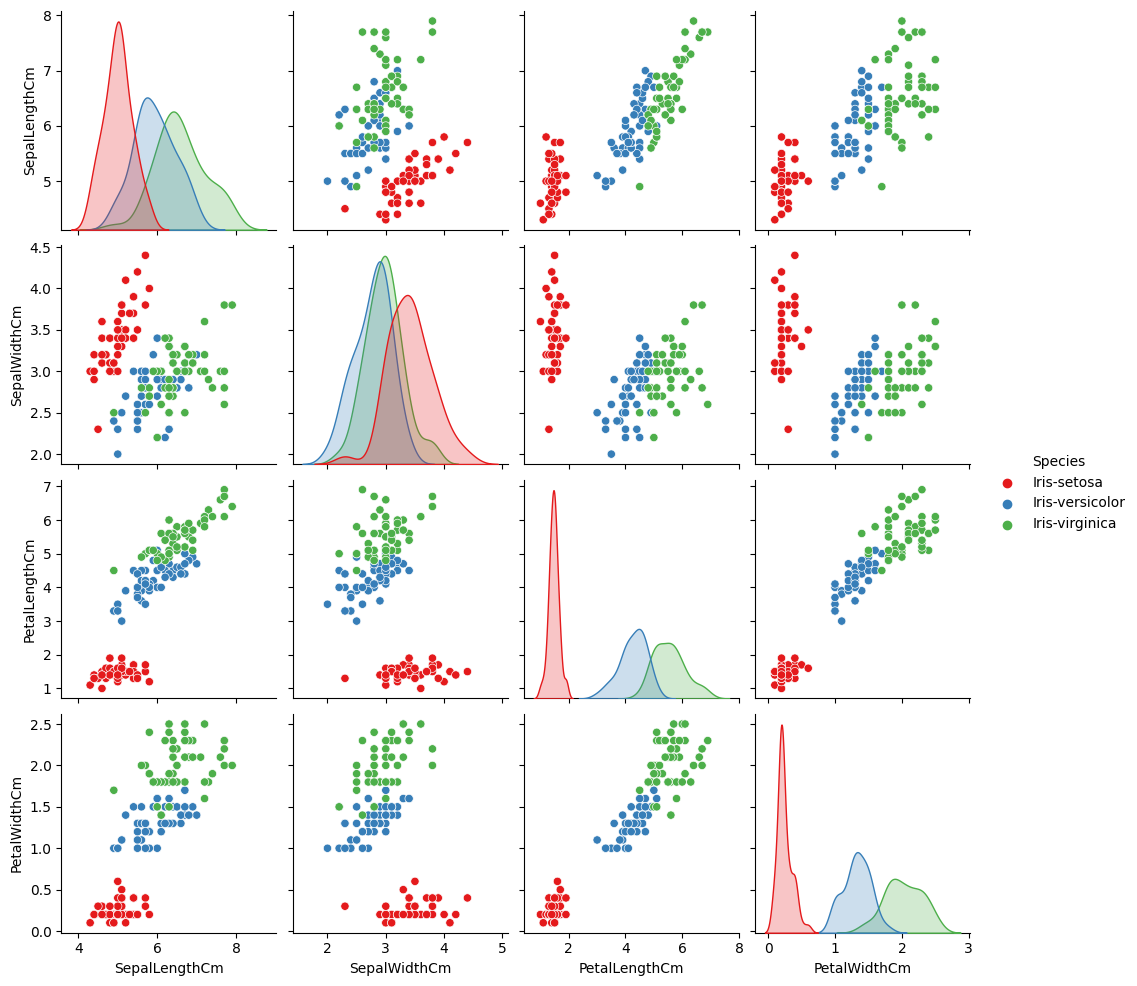

In [9]:
sns.pairplot(dataset, hue= "Species", palette="Set1")
plt.show()

From the above plots, we can conclude that classifying the dataset into classes can be more easily for K-mean with respect to some of the features. For example with respect to PetalLengthCm/PetalWidthCm, we can deduce that splitting into classes, is easy for the model, however, for some of the other features can be difficult.

But in this project, we want to build a UNSUPERVISED model, so we shouldn't have the target feature which is 'Species' in this dataset.

In [10]:
df = dataset.drop('Species', axis=1)

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Let's use the Elbow method to determine how many clusters actually would be good for us.

In [ ]:
elbow = []
for i in range(1,15):
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    elbow.append(kmean.inertia_)

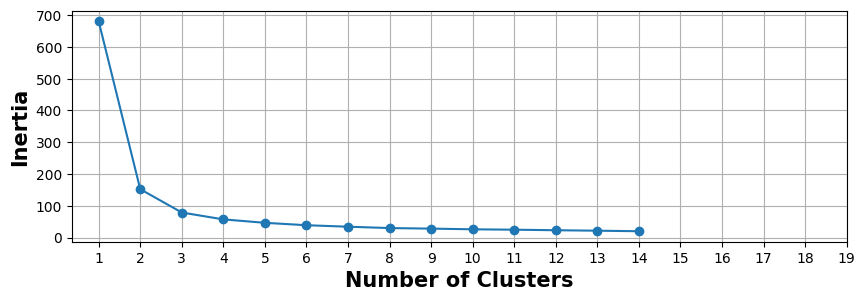

In [13]:
plt.figure(figsize = (10,3))
plt.plot(range(1,15), elbow, "-o")
plt.grid(True)
plt.xticks(range(1,20))
plt.xlabel("Number of Clusters", fontsize=15, fontweight='bold')
plt.ylabel("Inertia", fontsize=15, fontweight='bold')
plt.show()

As you can see, 3 or 4 would be OK, but which one is better? Let's try K=3 clusters.

In the below plots, we will consider two features(PetalLengthCm and PetalWidthCm) to compare the model classification and the real classification.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


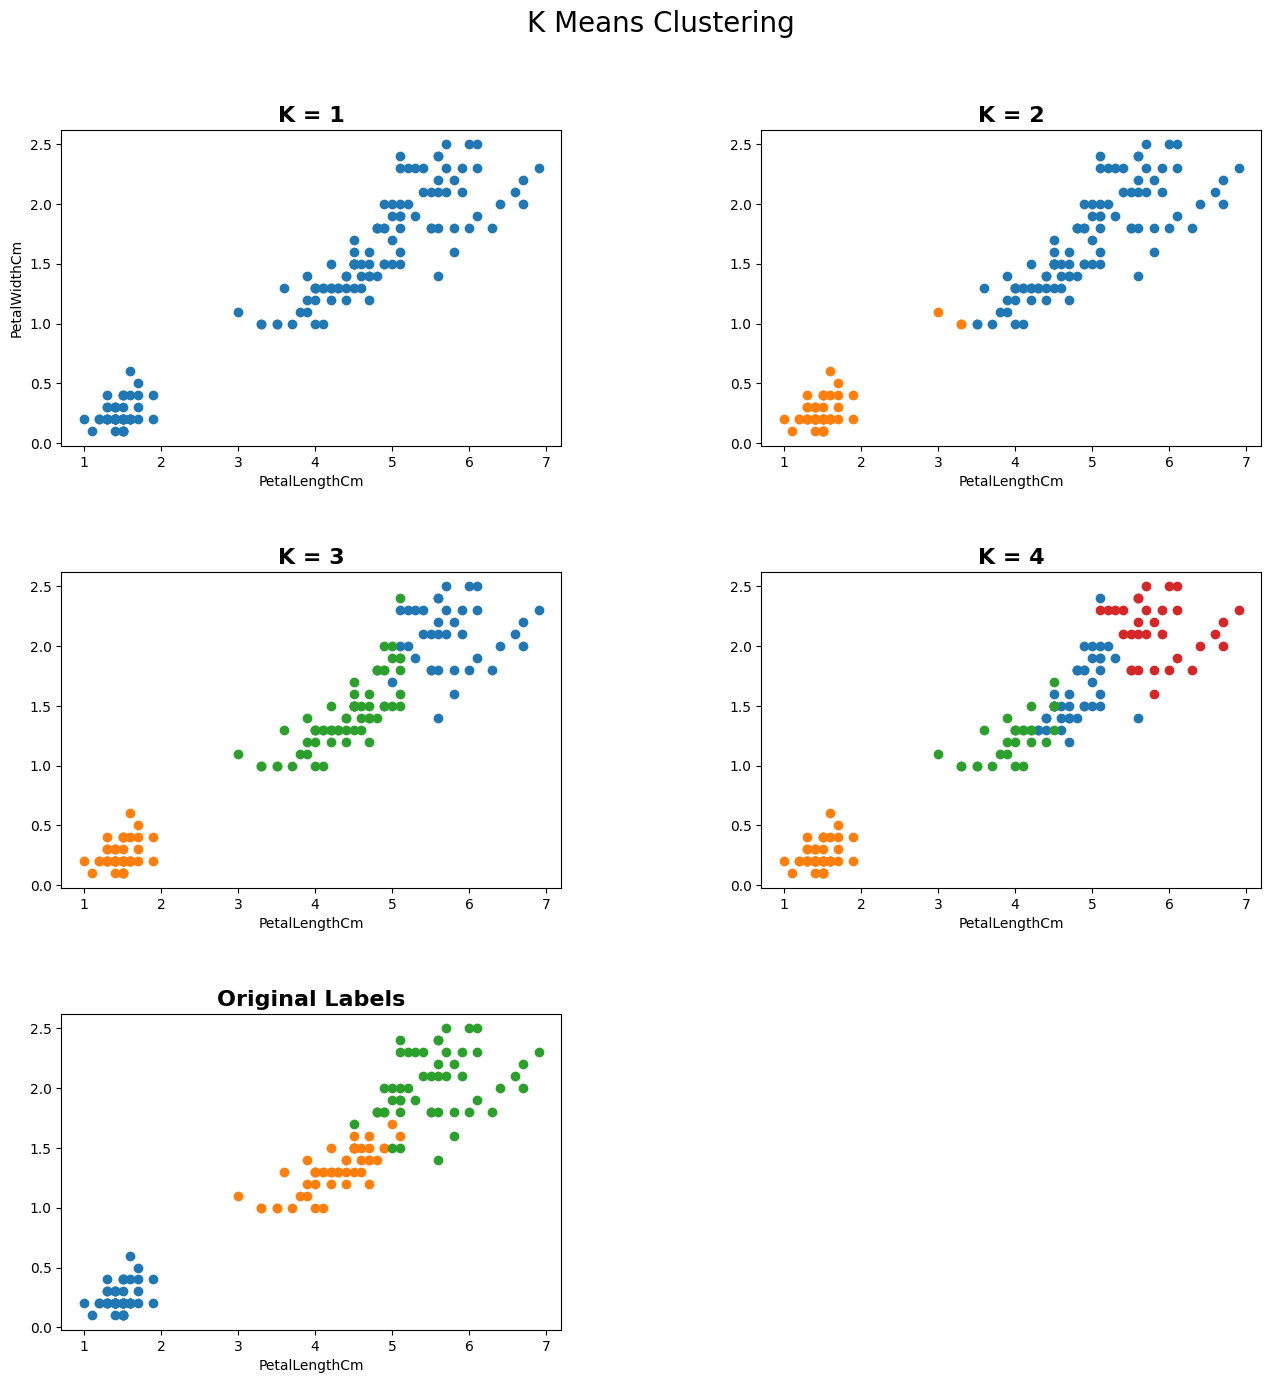

In [14]:
plt.figure(figsize = (15, 15))
plt.suptitle("Visualization of Different K's", fontsize=16, fontweight='bold')
# K = 1 Cluster
plt.subplot(3, 2, 1)
plt.title('K = 1', fontsize=16, fontweight='bold')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(df.PetalLengthCm, df.PetalWidthCm)

# K = 2 Cluster
plt.subplot(3,2,2)
plt.title('K = 2', fontsize=16, fontweight='bold')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
kmean = KMeans(n_clusters = 2)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.PetalLengthCm[df.label == 0], df.PetalWidthCm[df.label == 0])
plt.scatter(df.PetalLengthCm[df.label == 1], df.PetalWidthCm[df.label == 1])
df.drop('label', axis=1, inplace=True)

# K = 3 Cluster
plt.subplot(3,2,3)
plt.title('K = 3', fontsize=16, fontweight='bold')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
kmean = KMeans(n_clusters = 3)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.PetalLengthCm[df.label == 0], df.PetalWidthCm[df.label == 0])
plt.scatter(df.PetalLengthCm[df.label == 1], df.PetalWidthCm[df.label == 1])
plt.scatter(df.PetalLengthCm[df.label == 2], df.PetalWidthCm[df.label == 2])
df.drop('label', axis=1, inplace=True)

# K = 4 Cluster
plt.subplot(3,2,4)
plt.title('K = 4', fontsize=16, fontweight='bold')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
kmean = KMeans(n_clusters = 4)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.PetalLengthCm[df.label == 0], df.PetalWidthCm[df.label == 0])
plt.scatter(df.PetalLengthCm[df.label == 1], df.PetalWidthCm[df.label == 1])
plt.scatter(df.PetalLengthCm[df.label == 2], df.PetalWidthCm[df.label == 2])
plt.scatter(df.PetalLengthCm[df.label == 3], df.PetalWidthCm[df.label == 3])
df.drop('label', axis=1, inplace=True)

# Original
plt.subplot(3,2,5)
plt.title("Original Labels",fontsize=16, fontweight='bold')
plt.xlabel("PetalLengthCm")
plt.ylabel('PetalWidthCm')
plt.scatter(dataset.PetalLengthCm[dataset.Species == "Iris-setosa"],dataset.PetalWidthCm[dataset.Species == "Iris-setosa"])
plt.scatter(dataset.PetalLengthCm[dataset.Species == "Iris-versicolor"],dataset.PetalWidthCm[dataset.Species == "Iris-versicolor"])
plt.scatter(dataset.PetalLengthCm[dataset.Species == "Iris-virginica"],dataset.PetalWidthCm[dataset.Species == "Iris-virginica"])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

The K=3 plot and Orginal Label plot are almost the same, so the K=3 cluster is a good choice.

Let's try two other features(SepalWidthCm and PetalLengthCm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


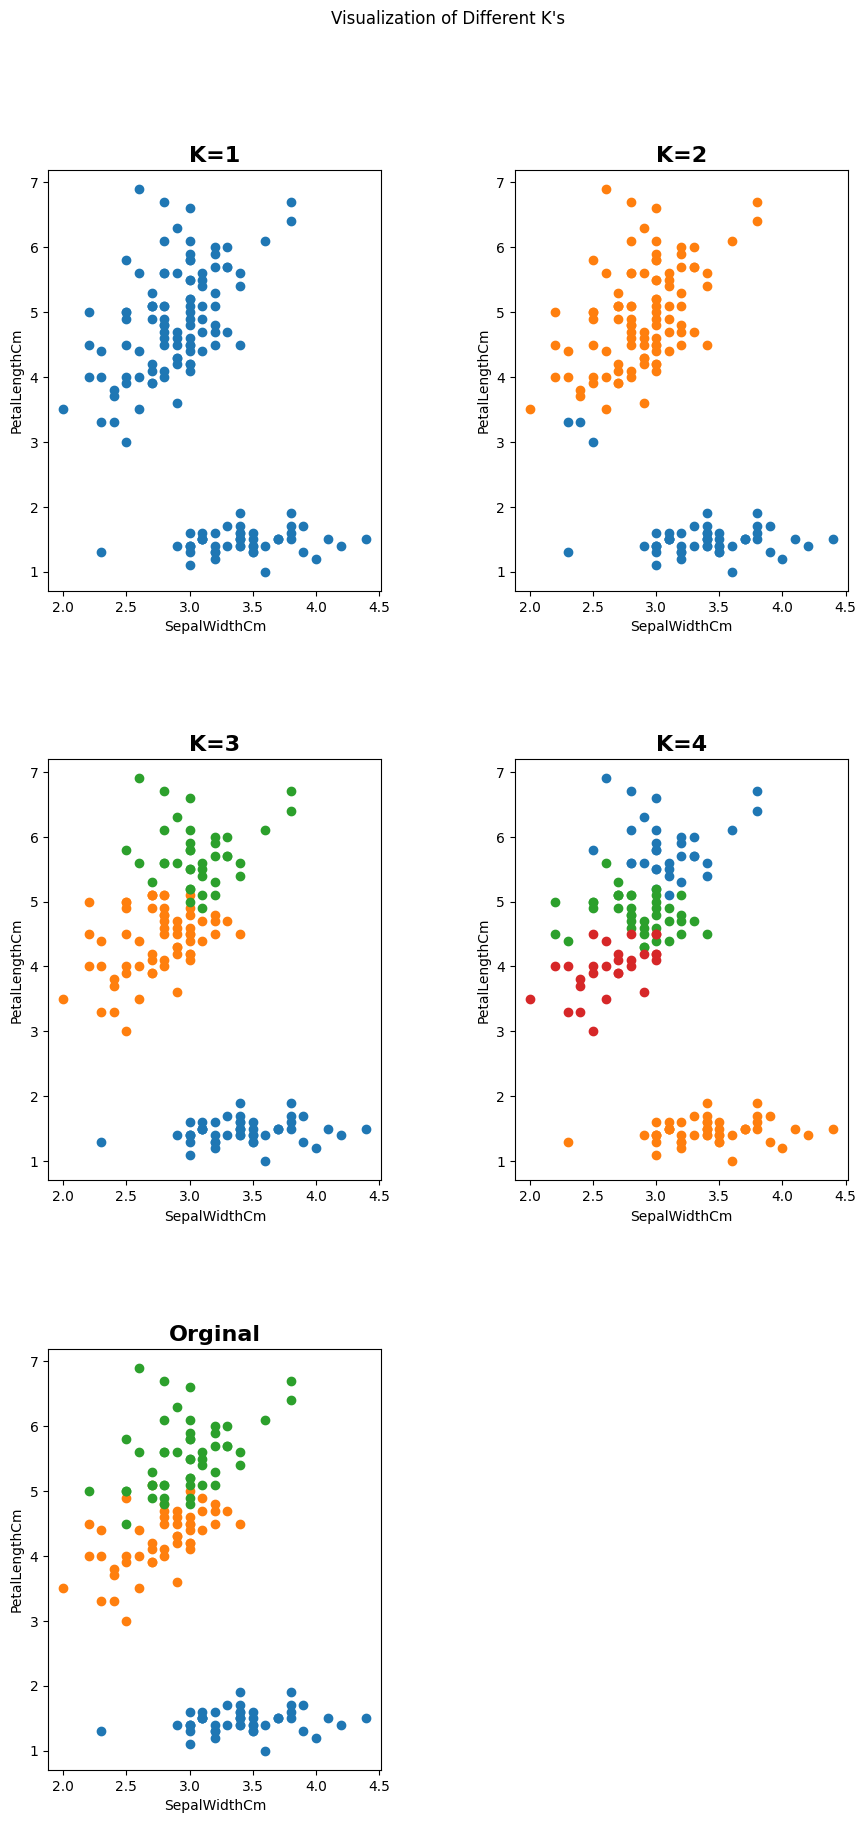

In [17]:
plt.figure(figsize = (10,20))
plt.suptitle("Visualization of Different K's")

plt.subplot(3,2,1)
plt.title('K=1', fontsize=16, fontweight='bold')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
kmean = KMeans(n_clusters=1)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.SepalWidthCm[df.label==0], df.PetalLengthCm[df.label==0])

df.drop('label', axis=1, inplace=True)

plt.subplot(3,2,2)
plt.title('K=2', fontsize=16, fontweight='bold')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
kmean = KMeans(n_clusters=2)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.SepalWidthCm[df.label==0], df.PetalLengthCm[df.label==0])
plt.scatter(df.SepalWidthCm[df.label==1], df.PetalLengthCm[df.label==1])

df.drop('label', axis=1, inplace=True)

plt.subplot(3,2,3)
plt.title('K=3', fontsize=16, fontweight='bold')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
kmean = KMeans(n_clusters=3)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.SepalWidthCm[df.label==0], df.PetalLengthCm[df.label==0])
plt.scatter(df.SepalWidthCm[df.label==1], df.PetalLengthCm[df.label==1])
plt.scatter(df.SepalWidthCm[df.label==2], df.PetalLengthCm[df.label==2])

df.drop('label', axis=1, inplace=True)

plt.subplot(3,2,4)
plt.title('K=4', fontsize=16, fontweight='bold')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
kmean = KMeans(n_clusters=4)
df['label'] = kmean.fit_predict(df)
plt.scatter(df.SepalWidthCm[df.label==0], df.PetalLengthCm[df.label==0])
plt.scatter(df.SepalWidthCm[df.label==1], df.PetalLengthCm[df.label==1])
plt.scatter(df.SepalWidthCm[df.label==2], df.PetalLengthCm[df.label==2])
plt.scatter(df.SepalWidthCm[df.label==3], df.PetalLengthCm[df.label==3])

df.drop('label', axis=1, inplace=True)

plt.subplot(3,2,5)
plt.title('Orginal', fontsize=16, fontweight='bold')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
plt.scatter(dataset.SepalWidthCm[dataset.Species == "Iris-setosa"],dataset.PetalLengthCm[dataset.Species == "Iris-setosa"])
plt.scatter(dataset.SepalWidthCm[dataset.Species == "Iris-versicolor"],dataset.PetalLengthCm[dataset.Species == "Iris-versicolor"])
plt.scatter(dataset.SepalWidthCm[dataset.Species == "Iris-virginica"],dataset.PetalLengthCm[dataset.Species == "Iris-virginica"])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Species', ylabel='Labels'>

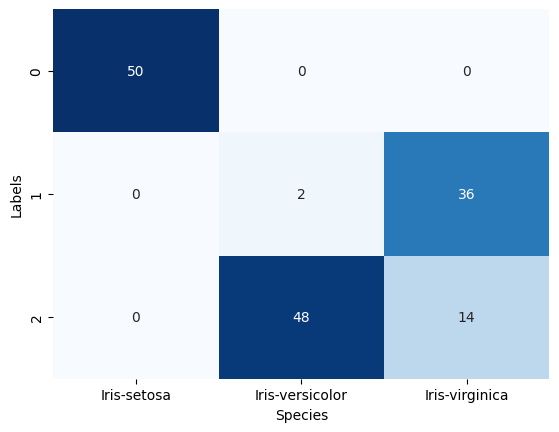

In [22]:
kmean = KMeans(n_clusters = 3)
y_pred = kmean.fit_predict(df)
df1 = pd.DataFrame({'Labels': y_pred,'Species':dataset.Species})
crosstab = pd.crosstab(df1.Labels, df1.Species)
sns.heatmap(crosstab, annot=True, cbar=False,cmap="Blues")

This is our FINAL result. our model's performance was really cool at the Iris-setosa type and was good enough at the Iris-versicolor type, but not so good at the Iris-virginica type.